# Premilinary operations

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=34e69a22e55c2bc645df32859edd6c8cf97ad5f038d9d21d0e86ce108b13f46d
  Stored in directory: /root/.cache/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


## Mount Google Drive

In [ ]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data import

In [ ]:
# import dataset
df_data = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Data Understanding and Preparation/DATASET PREPARED/df_prep_TRAIN.xlsx", index_col="Unnamed: 0")
X = df_data.values

In [ ]:
df_data.head()

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.604904,-1.113727,1.155846,-0.064505,0.746422,1.597947,0.032809,0.526054,0.663058,-1.434221,...,-0.583254,-1.515480,-0.248903,-0.405919,3.146246,-1.505367,0.202942,1.325865,0.035922,3.971428
1,0.565092,-1.067513,1.155846,-0.064505,0.941449,1.648120,0.032809,0.186319,0.920248,-1.261744,...,-0.816861,-0.814428,0.141589,-0.408215,-0.236257,-0.713717,-0.120760,0.953175,0.035922,-0.381447
2,0.610689,-0.946842,1.891250,-0.064505,1.011526,1.770978,-0.885806,0.614675,0.111653,-1.673729,...,-0.514856,-1.120598,-0.095555,-0.227969,2.741296,-1.301205,-0.232259,1.008646,0.035922,2.877028
3,0.598277,-0.975367,1.155846,-0.064505,1.569306,1.970460,-0.696296,0.565900,0.856282,-1.352954,...,-0.059808,-0.706300,-0.404156,-0.535901,-0.469754,-0.612675,-0.537815,0.888896,0.035922,-0.307128
4,0.595865,-1.306279,1.155846,-0.064505,0.488840,1.426924,-0.696296,0.269613,0.151788,-1.499722,...,-0.503638,-0.784317,0.042496,-0.230801,0.600646,-0.701060,0.212217,0.950638,0.035922,1.797345


#DISTANCE BASED


### kNN

In [ ]:
from pyod.models.knn import KNN

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNN(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
gs

GridSearchCV(cv=3,
             estimator=KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0),
             n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
clf = KNN(n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1665,  163]))

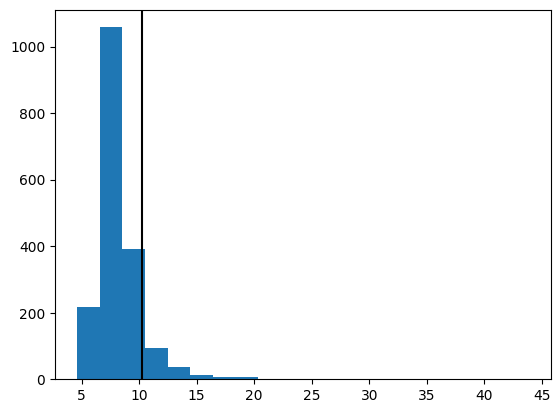

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
outliers = clf.predict(X)
index = df_data.index
prob = clf.decision_scores_

listatotale = []
for i, j in zip(index,prob):
  listatotale.append((i, j))

listatotale

[(0, 10.343907345836515),
 (1, 8.139356670338175),
 (2, 8.109238612521711),
 (3, 6.476780456428997),
 (4, 7.037622880360255),
 (5, 10.023624988021327),
 (6, 7.45119016540094),
 (7, 8.198331148851523),
 (8, 9.601672683034241),
 (9, 7.384443293236414),
 (10, 8.59485315739138),
 (11, 7.635669329157754),
 (12, 7.595542411465901),
 (13, 8.048853068427716),
 (14, 7.82163660696732),
 (15, 8.249320037368571),
 (16, 7.006634309240533),
 (17, 8.62812157773094),
 (18, 8.46301350007691),
 (19, 8.67504908679406),
 (20, 7.037622880360255),
 (21, 7.124081228179772),
 (22, 10.047896865955076),
 (23, 6.781039557745067),
 (24, 7.7059648149213),
 (25, 6.788273456400921),
 (26, 7.023532144914134),
 (27, 8.084664342064212),
 (28, 8.026124455479977),
 (29, 7.61112967502579),
 (30, 7.351153709439094),
 (31, 8.373416527436575),
 (32, 11.587822760709873),
 (33, 10.1592704100739),
 (34, 10.21214941144014),
 (35, 12.669746924435149),
 (36, 7.422089392254028),
 (37, 7.0294944491535905),
 (38, 7.638018548055152),


In [ ]:
len(listatotale)

1828

In [ ]:
sorted(
    listatotale, 
    key=lambda x: x[1],
    reverse=True
)[:18]

[(942, 43.81368682172193),
 (382, 38.98086873638979),
 (589, 34.413298537577205),
 (1704, 22.31383011892646),
 (1702, 19.246376368389548),
 (840, 18.981409796029684),
 (1703, 18.92448924175542),
 (1367, 18.91199285976029),
 (311, 18.700764472732878),
 (1720, 18.526448175243107),
 (308, 18.45013310695201),
 (314, 18.14966232534339),
 (324, 18.037123891831406),
 (1597, 17.942956912894594),
 (1707, 17.931469519004253),
 (315, 17.64815026631927),
 (656, 17.486251240414727),
 (309, 16.85293443091792)]

In [ ]:
for i, x in enumerate(outliers):
  if x == 1:
    print(i)

0
32
35
40
42
223
229
234
235
240
241
242
243
248
249
250
251
257
285
286
287
292
294
295
301
302
303
304
308
309
310
311
361
382
458
546
554
589
614
621
649
652
653
656
657
658
659
683
698
716
717
755
757
765
768
769
770
771
815
820
824
826
829
830
832
840
841
842
853
861
864
866
868
869
871
878
927
942
955
971
1012
1031
1057
1065
1073
1074
1083
1089
1095
1160
1176
1177
1179
1180
1184
1185
1187
1239
1240
1241
1243
1247
1281
1283
1352
1360
1396
1472
1480
1481
1483
1492
1496
1497
1498
1505
1506
1508
1513
1527
1541
1556
1558
1583
1606
1681
1682
1688
1700
1701
1702
1703
1704
1705
1706
1707
1714
1717
1719
1720
1721
1723
1738
1741
1746
1748
1750
1752
1755
1756
1757
1758
1759
1762
1765
1766
1767
1800
1801
1816
1817
1818
1819


####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
y = ["lightblue"] * 1828
for i in outliers:
  y[i] = "red"

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
import matplotlib.pyplot as plt

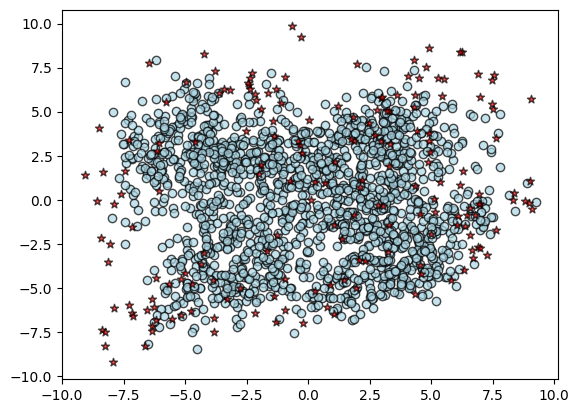

In [ ]:
plt.scatter(X_train_pca[outliers == 0, 0], X_train_pca[outliers == 0, 1], c='lightblue', 
            edgecolor='k', alpha=0.7)

# Plot outliers
plt.scatter(X_train_pca[outliers == 1, 0], X_train_pca[outliers == 1, 1], c='red', 
            edgecolor='k', alpha=0.7, marker='*')

plt.show()

In [ ]:
outliers

array([1, 0, 0, ..., 0, 0, 0])

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

<ipython-input-206-8b750f8c9ee7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


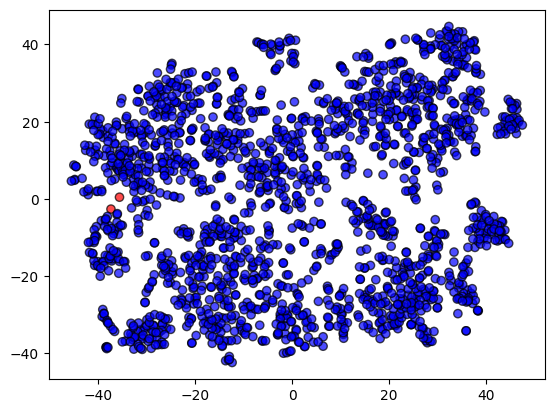

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### Random Subspace Projection

In [ ]:
from sklearn import random_projection

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

<ipython-input-209-6917eba6e766>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


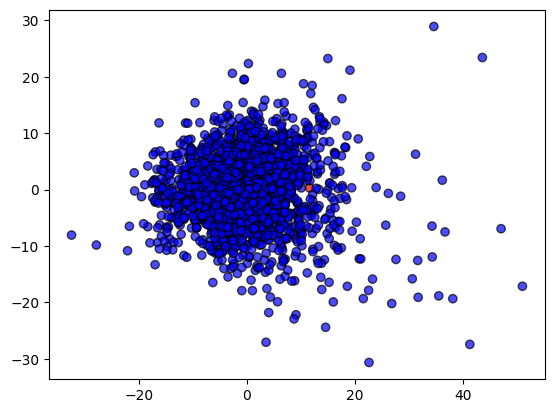

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### IsoMap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

<ipython-input-212-381ccafbc4fb>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


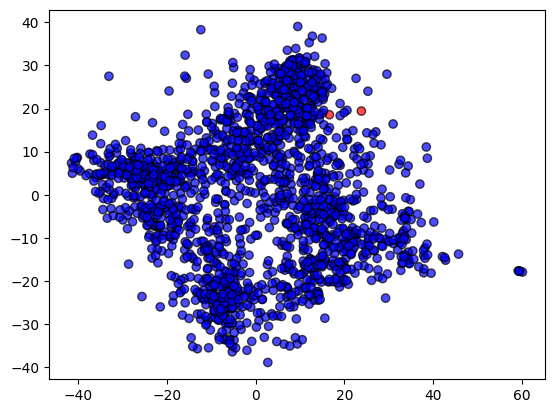

In [ ]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#Density Based

### LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [ ]:
clf = LocalOutlierFactor(n_neighbors=2, novelty=True) # , novelty=True
clf.fit(X)

y_pred = clf.predict(X)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([   1, 1827]))

In [ ]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  22, 1806]))

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

In [ ]:
clf.negative_outlier_factor_

array([-1.38006996, -1.43610892, -0.98622783, ..., -1.1503387 ,
       -1.07083044, -1.09000942])

In [ ]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  22, 1806]))

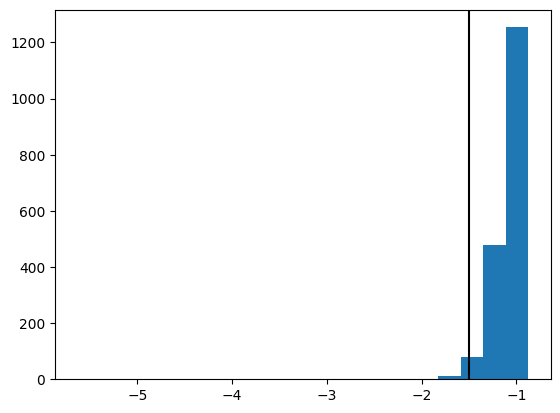

In [ ]:
plt.hist(clf.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf.negative_outlier_factor_[np.where(outliers==1)]), c='k')
plt.show()

<ipython-input-220-e63a9bd90fb4>:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-220-e63a9bd90fb4>:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


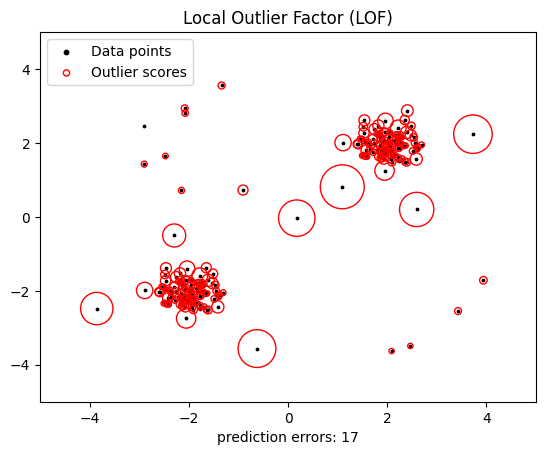

In [ ]:
np.random.seed(100)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.01)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
from pyod.models.lof import LOF

In [ ]:
clf = LOF()
clf.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1668,  160]))

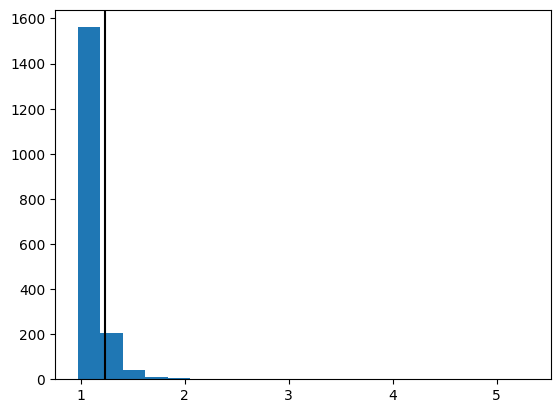

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
outliers = clf.predict(X)
index = df_data.index
prob = clf.decision_scores_

listatotale = []
for i, j in zip(index,prob):
  listatotale.append((i, j))

listatotale

[(0, 1.33735736924211),
 (1, 1.2169944674638484),
 (2, 1.133953247791691),
 (3, 1.0260705550075406),
 (4, 1.0114549735381182),
 (5, 1.2416227389055021),
 (6, 1.0248300365937721),
 (7, 1.121957616898997),
 (8, 1.1943179887445439),
 (9, 1.0330931018204803),
 (10, 1.1188711549076509),
 (11, 1.043914936446476),
 (12, 1.0973510998888563),
 (13, 1.0971575384214916),
 (14, 1.0456703112828003),
 (15, 1.0943401635907724),
 (16, 1.0412816027529845),
 (17, 1.1025476889114418),
 (18, 1.0683061745557128),
 (19, 1.1392731231770208),
 (20, 1.006021497351204),
 (21, 1.0310674826903203),
 (22, 1.2290198271247763),
 (23, 0.998837280805658),
 (24, 1.0497418603875488),
 (25, 0.9993459400117098),
 (26, 1.0023193217301576),
 (27, 1.0605457723576366),
 (28, 1.058326436885042),
 (29, 1.0301039967606545),
 (30, 1.031568983534389),
 (31, 1.0898233518949585),
 (32, 1.2380920153789956),
 (33, 1.1335185569962918),
 (34, 1.1938790752214214),
 (35, 1.2397129889927618),
 (36, 1.0591057847776264),
 (37, 1.039804646674

In [ ]:
len(listatotale)

1828

In [ ]:
sorted(
    listatotale, 
    key=lambda x: x[1],
    reverse=True
)[:18]

[(942, 5.30722547584435),
 (382, 4.187680136676178),
 (589, 3.8357930093211854),
 (840, 1.957762632867221),
 (324, 1.8619272123548054),
 (1367, 1.8596367108051237),
 (1597, 1.8594022581129885),
 (314, 1.8575745945179605),
 (315, 1.8180265345332898),
 (871, 1.6973335833631418),
 (869, 1.6851663174225995),
 (841, 1.6812004043984312),
 (1481, 1.6377305763743095),
 (308, 1.6313202976605126),
 (1704, 1.6269089123839031),
 (311, 1.622283028185017),
 (458, 1.6194842106311267),
 (1700, 1.6187951052970306)]

In [ ]:
for i, x in enumerate(outliers):
  if x == 1:
    print(i)

0
156
223
229
234
235
243
248
249
250
251
256
257
286
292
294
295
304
308
309
310
311
314
315
324
332
361
382
425
458
484
524
543
546
554
560
572
589
621
649
652
653
656
657
659
660
683
698
717
755
757
765
768
769
770
771
784
805
815
824
826
827
829
830
832
833
840
841
842
853
861
868
869
870
871
878
884
927
942
955
971
1031
1057
1065
1074
1083
1089
1095
1160
1179
1180
1204
1206
1236
1239
1241
1243
1247
1281
1283
1296
1341
1352
1360
1367
1396
1406
1469
1472
1480
1481
1483
1488
1492
1494
1496
1497
1498
1505
1508
1512
1513
1527
1541
1556
1558
1580
1597
1678
1682
1688
1692
1693
1700
1701
1702
1703
1704
1705
1707
1717
1719
1720
1738
1741
1746
1748
1752
1755
1756
1757
1759
1762
1765
1766
1767
1800
1801
1817
1819


####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
y = ["lightblue"] * 1828
for i in outliers:
  y[i] = "red"

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
import matplotlib.pyplot as plt

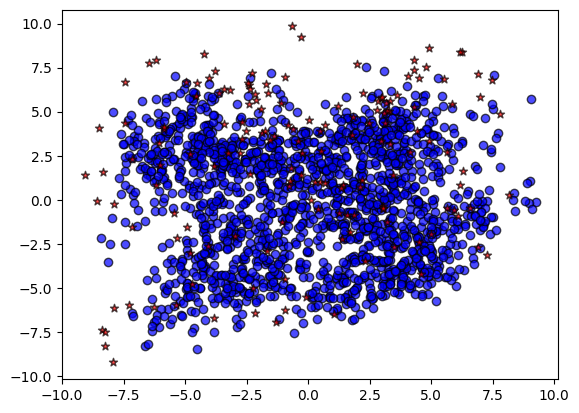

In [ ]:
plt.scatter(X_train_pca[outliers == 0, 0], X_train_pca[outliers == 0, 1], c='lightblue', 
            edgecolor='k', alpha=0.7)

# Plot outliers
plt.scatter(X_train_pca[outliers == 1, 0], X_train_pca[outliers == 1, 1], c='red', 
            edgecolor='k', alpha=0.7, marker='*')

plt.show()

In [ ]:
outliers

array([1, 0, 0, ..., 0, 0, 0])

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

<ipython-input-238-8b750f8c9ee7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


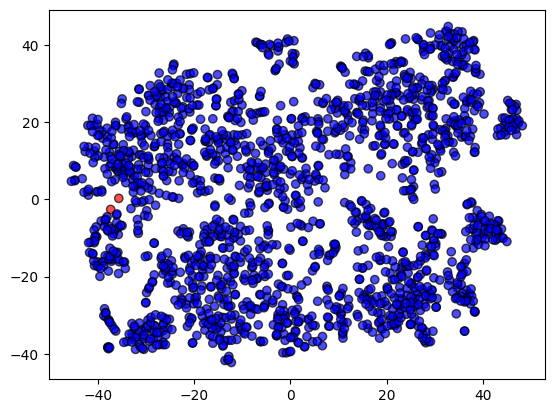

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### Random Subspace Projection

In [ ]:
from sklearn import random_projection

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

<ipython-input-241-6917eba6e766>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


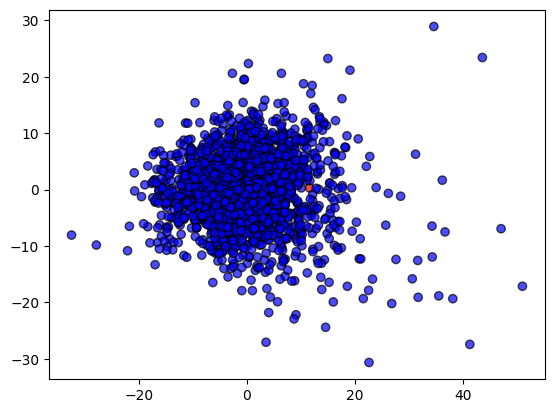

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### IsoMap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

<ipython-input-244-381ccafbc4fb>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


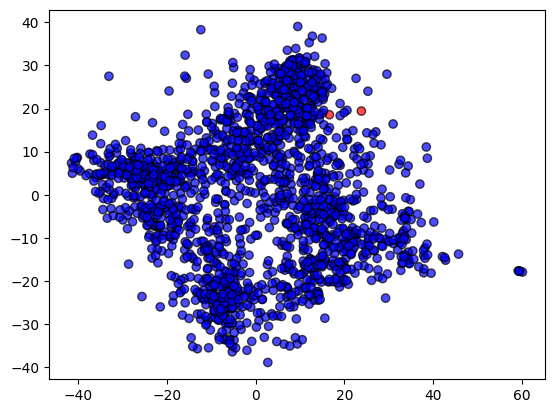

In [ ]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#High Dimensional

## ABOD

In [ ]:
from pyod.models.abod import ABOD

In [ ]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1581,  247]))

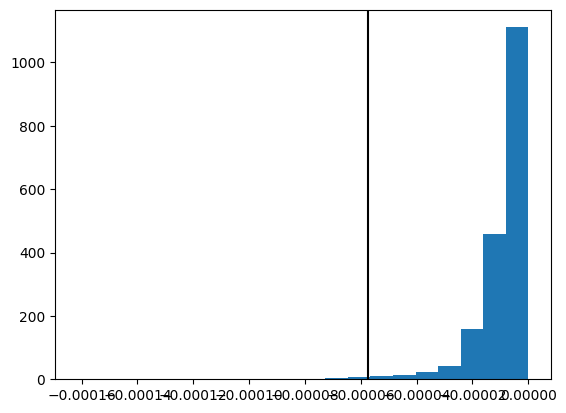

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
outliers = clf.predict(X)
index = df_data.index
prob = clf.decision_scores_

listatotale = []
for i, j in zip(index,prob):
  listatotale.append((i, j))

listatotale

[(0, -7.260939650930561e-07),
 (1, -3.7237117520094083e-06),
 (2, -1.8924264026419973e-05),
 (3, -9.817624600639895e-06),
 (4, -6.611843478644508e-06),
 (5, -7.599992765043401e-06),
 (6, -3.74354886673754e-05),
 (7, -2.7103459985401062e-06),
 (8, -1.2049245659964654e-06),
 (9, -1.93979955489664e-05),
 (10, -3.967641429579461e-06),
 (11, -1.8800637090651183e-05),
 (12, -1.5327767110333775e-05),
 (13, -7.121999639822082e-06),
 (14, -1.0435669795715118e-05),
 (15, -1.0901399168542729e-05),
 (16, -1.7511663758579667e-05),
 (17, -2.8018122438797505e-06),
 (18, -5.525640971745093e-06),
 (19, -1.1507243166455628e-05),
 (20, -1.4294636366754128e-05),
 (21, -9.574918083379185e-06),
 (22, -8.894014209387264e-06),
 (23, -1.4792987618964198e-05),
 (24, -4.718285014609605e-06),
 (25, -5.052619568640889e-06),
 (26, -2.084595369305312e-05),
 (27, -6.327442023847574e-06),
 (28, -3.5529093870246615e-06),
 (29, -3.7059431466779825e-06),
 (30, -9.020550020439501e-06),
 (31, -5.808015902455423e-06),
 (32,

In [ ]:
len(listatotale)

1828

In [ ]:
sorted(
    listatotale, 
    key=lambda x: x[1],
    reverse=True
)[:18]

[(942, -4.164719970750772e-12),
 (382, -4.447594915395049e-08),
 (1702, -1.0794084452435365e-07),
 (1765, -1.4647384089719082e-07),
 (292, -1.5080273604252428e-07),
 (251, -1.63707569097732e-07),
 (826, -1.7098801242698575e-07),
 (294, -1.7170305095509218e-07),
 (1752, -1.726669120425238e-07),
 (771, -1.7801595138368266e-07),
 (458, -1.8558374455510053e-07),
 (832, -1.8774749407142593e-07),
 (250, -2.0639968317319196e-07),
 (1756, -2.2539168290920082e-07),
 (1204, -2.2558036736531265e-07),
 (1759, -2.608719413436313e-07),
 (295, -2.702283704419243e-07),
 (1241, -2.883858976079953e-07)]

In [ ]:
for i, x in enumerate(outliers):
  if x == 1:
    print(i)

0
8
32
40
42
48
51
76
90
94
100
147
148
152
162
195
201
223
233
234
235
238
241
243
244
245
248
249
250
251
252
256
276
281
283
285
292
294
295
297
300
303
308
309
311
321
355
360
382
408
426
434
458
459
460
487
524
541
554
557
565
568
589
636
640
642
643
649
652
653
656
657
658
659
668
676
683
698
708
712
713
717
741
745
746
750
751
753
757
760
761
765
768
769
770
771
776
777
780
783
784
815
824
826
827
830
832
840
841
842
852
853
864
867
868
878
889
892
927
942
952
955
979
982
991
997
998
1010
1012
1024
1028
1029
1030
1031
1047
1049
1052
1054
1056
1057
1058
1061
1065
1066
1074
1080
1081
1083
1088
1089
1160
1163
1168
1172
1176
1177
1179
1186
1187
1189
1194
1195
1204
1221
1228
1231
1236
1239
1240
1241
1242
1247
1281
1283
1288
1313
1341
1352
1360
1375
1396
1466
1469
1480
1483
1486
1489
1490
1491
1492
1494
1495
1496
1497
1498
1499
1503
1505
1507
1513
1525
1527
1540
1550
1556
1586
1594
1604
1608
1678
1681
1682
1683
1685
1688
1700
1702
1703
1704
1706
1707
1713
1714
1716
1719
1720
1738
1743

####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
y = ["lightblue"] * 1828
for i in outliers:
  y[i] = "red"

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
import matplotlib.pyplot as plt

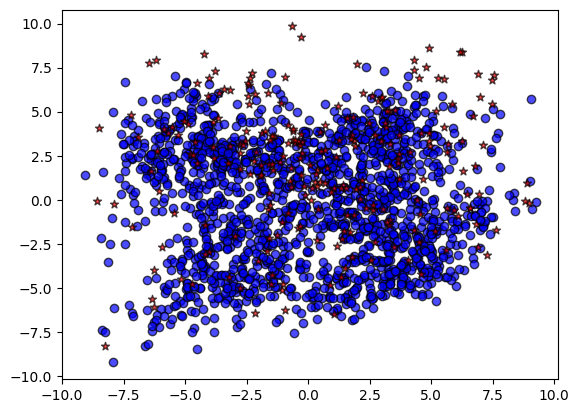

In [ ]:
plt.scatter(X_train_pca[outliers == 0, 0], X_train_pca[outliers == 0, 1], c='lightblue', 
            edgecolor='k', alpha=0.7)

# Plot outliers
plt.scatter(X_train_pca[outliers == 1, 0], X_train_pca[outliers == 1, 1], c='red', 
            edgecolor='k', alpha=0.7, marker='*')

plt.show()

In [ ]:
outliers

array([1, 0, 0, ..., 0, 0, 0])

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

<ipython-input-262-8b750f8c9ee7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


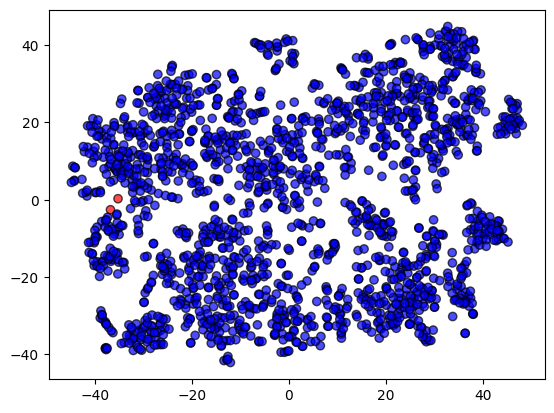

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### Random Subspace Projection

In [ ]:
from sklearn import random_projection

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

<ipython-input-265-6917eba6e766>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


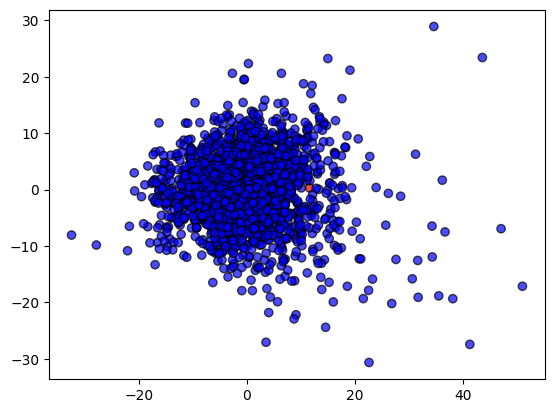

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### IsoMap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

<ipython-input-268-381ccafbc4fb>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


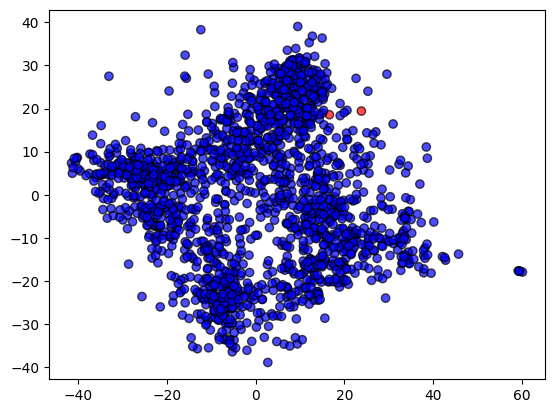

In [ ]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##Ensable Based


### LODA

In [ ]:
from pyod.models.loda import LODA

In [ ]:
clf = LODA()
clf.fit(X)

LODA(contamination=0.1, n_bins=10, n_random_cuts=100)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1645,  183]))

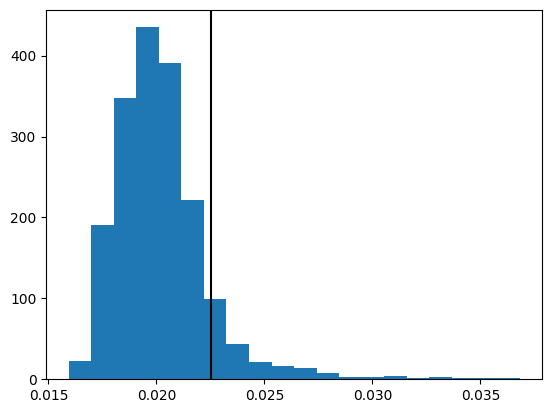

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
outliers = clf.predict(X)
index = df_data.index
prob = clf.decision_scores_

listatotale = []
for i, j in zip(index,prob):
  listatotale.append((i, j))

listatotale

[(0, 0.02579504762179691),
 (1, 0.020546552285282814),
 (2, 0.020763781428584184),
 (3, 0.01885170309017106),
 (4, 0.020414421376657353),
 (5, 0.022227130827046436),
 (6, 0.02037935308660397),
 (7, 0.021774132700975436),
 (8, 0.023310187369986725),
 (9, 0.01939887706693557),
 (10, 0.021223357110209378),
 (11, 0.01988098758971712),
 (12, 0.018161858151542375),
 (13, 0.019600830832979598),
 (14, 0.018545883580600463),
 (15, 0.01938222072170794),
 (16, 0.018005577575904364),
 (17, 0.019527963008233614),
 (18, 0.018182939698533927),
 (19, 0.016575593070051423),
 (20, 0.01859018856932812),
 (21, 0.020550645104133767),
 (22, 0.023747991590189962),
 (23, 0.020468831412576768),
 (24, 0.01980951111267889),
 (25, 0.01969567527038973),
 (26, 0.0201135085843569),
 (27, 0.017976084234505696),
 (28, 0.019331330616991868),
 (29, 0.017916909115818377),
 (30, 0.018606249604769264),
 (31, 0.01941886673981401),
 (32, 0.023184275212401007),
 (33, 0.021541856297488504),
 (34, 0.021992889895534603),
 (35, 0

In [ ]:
len(listatotale)

1828

In [ ]:
sorted(
    listatotale, 
    key=lambda x: x[1],
    reverse=True
)[:18]

[(1704, 0.03681459196494973),
 (223, 0.03487323193677165),
 (1597, 0.03390393322439575),
 (314, 0.03377994945055755),
 (382, 0.03360243070305168),
 (315, 0.03303366095630153),
 (324, 0.032914736308753974),
 (1367, 0.032059479393989274),
 (1703, 0.03195394796670329),
 (656, 0.031313532806290546),
 (1702, 0.031211769569419057),
 (1706, 0.031203466700497128),
 (869, 0.030741966892030077),
 (148, 0.03051481345821542),
 (589, 0.030375501846040428),
 (1758, 0.029882584839286953),
 (308, 0.029225913441554882),
 (1480, 0.029158581276165295)]

In [ ]:
for i, x in enumerate(outliers):
  if x == 1:
    print(i)

0
8
22
32
35
40
42
53
55
95
146
148
171
173
174
175
198
199
223
234
235
240
241
242
243
248
249
250
251
254
256
257
278
285
287
292
294
302
303
304
308
309
310
311
312
314
315
324
329
330
352
354
358
360
364
382
386
403
406
425
460
484
536
539
546
553
554
560
561
562
563
589
613
614
622
643
656
657
659
683
717
769
771
803
815
824
826
829
831
840
841
853
868
869
871
940
942
969
971
999
1002
1008
1010
1011
1012
1028
1030
1031
1047
1074
1083
1172
1176
1177
1240
1259
1283
1292
1293
1341
1352
1358
1360
1363
1367
1387
1396
1406
1407
1472
1480
1481
1483
1492
1494
1496
1498
1505
1506
1564
1570
1583
1597
1603
1604
1606
1612
1615
1681
1682
1688
1700
1701
1702
1703
1704
1705
1706
1707
1709
1720
1722
1738
1741
1748
1750
1752
1756
1757
1758
1759
1765
1766
1768
1770
1779
1800
1801
1805
1810
1816
1817
1819


####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
y = ["lightblue"] * 1828
for i in outliers:
  y[i] = "red"

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
import matplotlib.pyplot as plt

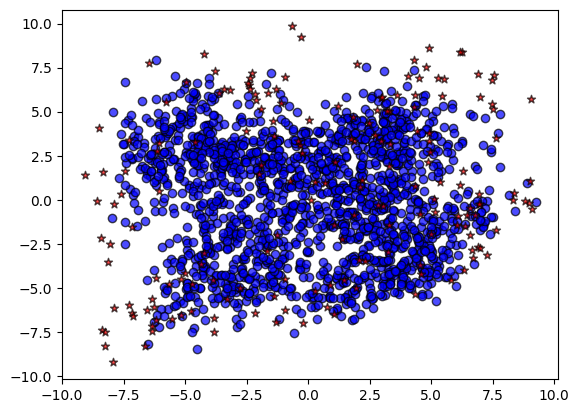

In [ ]:
plt.scatter(X_train_pca[outliers == 0, 0], X_train_pca[outliers == 0, 1], c='lightblue', 
            edgecolor='k', alpha=0.7)

# Plot outliers
plt.scatter(X_train_pca[outliers == 1, 0], X_train_pca[outliers == 1, 1], c='red', 
            edgecolor='k', alpha=0.7, marker='*')

plt.show()

In [ ]:
outliers

array([1, 0, 0, ..., 0, 0, 0])

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

<ipython-input-286-8b750f8c9ee7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


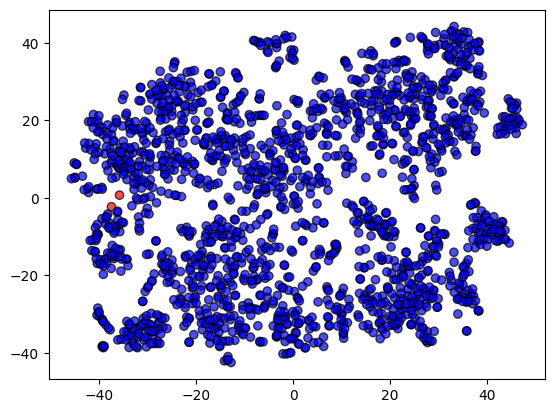

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### Random Subspace Projection

In [ ]:
from sklearn import random_projection

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

<ipython-input-289-6917eba6e766>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


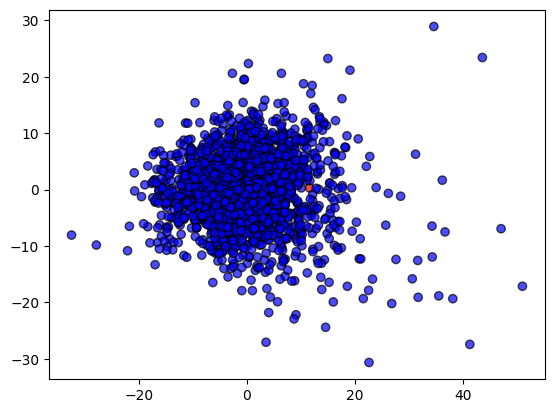

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#### IsoMap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

<ipython-input-292-381ccafbc4fb>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)


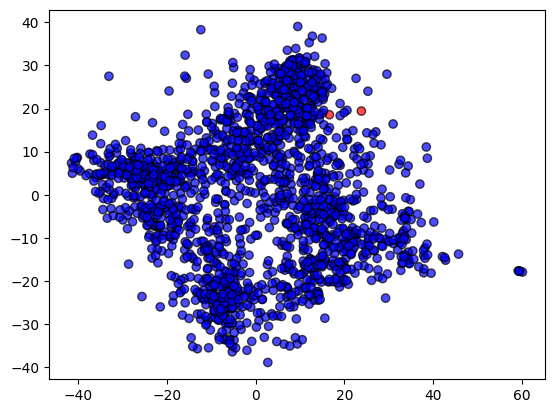

In [ ]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()